# Project: Wrangling and Analyze Data

In [2]:
# Import all the Python libraries needed for the gathering, assessing and cleaning
import requests as rq #to get 
import pandas as pd
import numpy as np
import tweepy as tp
from tweepy import OAuthHandler as OAH
import json as js
from timeit import default_timer as tm
from datetime import datetime as dt
from dateutil.parser import parse as ps
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sn
import matplotlib.image as mpg

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
#import the WeRateDogs Twitter archive csv data into the Pandas Dataframe
twi_arc=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#Check the first observation of the data uploaded
twi_arc.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#Ues the request to send HTTP request to page where the image prediction is domiciled and store it in res
res=rq.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

#test code for determing if the data import is successful without error
res.status_code

200

In [6]:
#Get the scarpped data type and its encoding
res.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [7]:
# Save the scrapped TSV to file
with open("image-predictions.tsv", mode='wb') as file:
    file.write(res.content)

In [8]:
#Put the image prediction tsv file to pandas data frame for possible assessment
image_pred=pd.read_csv('image-predictions.tsv', sep='\t')

In [9]:
#Show the first 3 top data of image prediction data just uploaded
image_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
#writing python codes to extract the each tweet in the Twitter and have them saved a JSON in a txt readable file.
#Note that conskey, cons_scrt, acc_tokn and acc_scrt are not shown in compliance with Twitter's API terms and conditions
conskey = '************'
cons_scrt = '************'
acc_tokn = '*************'
acc_scrt = '************'

auth = OAH(conskey, cons_scrt)
auth.set_access_token(acc_tokn, acc_scrt)

api = tp.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
twt_ids = twi_arc.tweet_id.values
len(twt_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = tm()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for twt_id in twt_ids:
        count += 1
        print(str(count) + ": " + str(twt_id))
        try:
            tweet = api.get_status(twt_id, twt_mode='extended')
            print("Success")
            js.dump(tweet._json, outfile)
            outfile.write('\n')
        except tp.TweepError as e:
            print("Fail")
            fails_dict[twt_id] = e
            pass
end = tm()
print(end - start)
print(fails_dict)

In [10]:
#Given that the data have been saved in the Jupyter workspace
#The tweet json text file is loaded and have it store in a list and then covert it to Pandas dataFrame for assessment.
#create an empty list and append the JSON data in txt file and then convert it to dataframe 
twt_data=list()
with open('tweet-json.txt') as file:
    for x in file:
        twt_data.append(js.loads(x))
        """The tweet-json.txt has been
        read into empty list earlier created.
        The next step is to convert it to
        Pandas DataFrame"""
twt_data1=pd.DataFrame(twt_data)

In [11]:
#Check the first 3 observations of the data
twt_data1.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


#### Visual Assessment

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [12]:
#To carry out visual assessment, we need to show all columns and all rows 
#So that we glance for any quality or tidiness issues
pd.set_option('display.max_rows', 50)               #This is to display max rows
pd.set_option('display.max_columns', 50)            #This is to display max columns
pd.set_option('display.max_colwidth', 250)           #This is to shows the full columns width in the dataset

In [13]:
display(twt_data1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https:/...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/...",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,892420643555336193,892420643555336193,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https:...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co...",33819,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",None,892177421306343426,892177421306343426,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https:...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co...",25461,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,None,891815181378084864,891815181378084864,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate..."
3,None,None,Sun Jul 30 15:58:51 +

##### Programmatic Assessment

In [14]:
#show the summary statistics of the tweet data to be analysed
twt_data1.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2354.000000,2.354000e+03,7.800000e+01,7.800000e+01,2.900000e+01,2354.000000
mean,8080.968564,7.426978e+17,7.455079e+17,2.014171e+16,8.162686e+17,3164.797366
std,11814.771334,6.852812e+16,7.582492e+16,1.252797e+17,6.164161e+16,5284.770364
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1415.000000,6.783975e+17,6.757419e+17,3.086374e+08,7.888183e+17,624.500000
50%,3603.500000,7.194596e+17,7.038708e+17,4.196984e+09,8.340867e+17,1473.500000
75%,10122.250000,7.993058e+17,8.257804e+17,4.196984e+09,8.664587e+17,3652.000000
max,132810.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79515.000000


In [15]:
#Show detailed information about about the WeRateDog tweet data
twt_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [16]:
#Display the dimension of the data
twt_data1.shape

(2354, 31)

*from the data dimension above, it is evident that are about 2354 observation in the data and 31 columns*

In [17]:
#Show the number of missing values in each field or columns
twt_data1.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [18]:
#Show 10 random sample observation from the data
twt_data1.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1119,None,None,Fri May 13 00:56:32 +0000 2016,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 730924639128584192, 'id_str': '730924639128584192', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/media/CiTEFjDXAAAqU6I.jpg', 'media_url_https': 'https:...","{'media': [{'id': 730924639128584192, 'id_str': '730924639128584192', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/media/CiTEFjDXAAAqU6I.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CiTEFjDXAAAqU6I.jpg', 'url': 'https://t.co...",6682,False,We only rate dogs. Pls stop sending non-canines like this Bulgarian Eyeless Porch Bear. This is unacceptable... 9/10 https://t.co/2yctWAUZ3Z,None,730924654643314689,730924654643314689,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,2234,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate..."
382,None,None,Thu Feb 02 17:00:17 +0000 2017,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 827199955093843969, 'id_str': '827199955093843969', 'indices': [130, 153], 'media_url': 'http://pbs.twimg.com/media/C3rN-fmWcAEUZFp.jpg', 'media_url_https': 'https:...","{'media': [{'id': 827199955093843969, 'id_str': '827199955093843969', 'indices': [130, 153], 'media_url': 'http://pbs.twimg.com/media/C3rN-fmWcAEUZFp.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C3rN-fmWcAEUZFp.jpg', 'url': 'https://t.co...",11659,False,This is Charlie. He wins every game of chess he plays. Won't let opponent pet him until they forfeit. 13/10 you win again Charlie https://t.co/UkyQibIBzZ,None,827199976799354881,827199976799354881,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,2579,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate..."
341,None,None,Thu Feb 16 04:45:50 +0000 2017,"[13, 40]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'docmisterio', 'name': 'Zach Becker', 'id': 30582082, 'id_str': '30582082', 'indices': [0, 12]}], 'urls': []}",NaN,72,False,@docmisterio account started on 11/15/15,None,832088576586297345,832088576586297345,docmisterio,8.320875e+17,832087547559997440,30582082.0,30582082,False,en,None,NaN,NaN,NaN,NaN,NaN,3,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate..."
2328,None,None,Mon Nov 16 21:10:36 +0000 2015,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666362717482020864, 'id_str': '666362717482020864', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg', 'media_url_https': 'https:...","{'media': [{'id': 666362717482020864, 'id_str': '666362717482020864', 'indices': [117, 140],

In [19]:
#display the values of Lang columns
twt_data1['lang'].value_counts()

en     2336
und       7
in        3
nl        3
ro        1
et        1
tl        1
eu        1
es        1
Name: lang, dtype: int64

In [20]:
#display the values of favorited columns
twt_data1['favorited'].value_counts()

False    2346
True        8
Name: favorited, dtype: int64

In [21]:
twi_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [22]:
#Randomly sample the twitter archive data
twi_arc.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/v/iEggaEOiLO3",13,10,mad,None,None,pupper,None
1902,674644256330530816,NaN,NaN,2015-12-09 17:38:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you see sophomores in high school driving. 11/10 https://t.co/m6aC8d1Kzp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674644256330530816/photo/1,11,10,None,None,None,None,None
283,838952994649550848,NaN,NaN,2017-03-07 03:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN https://t.co/ngAxYLVYHP,NaN,NaN,NaN,https://twitter.com/ktla/status/838948714227998720,13,10,None,None,None,None,None
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.co/s2yYuHabWl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792070062081/photo/1,10,10,Timison,None,None,None,None
722,783085703974514689,NaN,NaN,2016-10-03 23:25:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Earl. He can't catch. Did his best tho. 11/10 would repair confidence with extra pats https://t.co/IsqyvbjFgM,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/783085703974514689/photo/1,https://twitter.com/dog_rates/status/783085703974514689/photo/1",11,10,Earl,None,None,None,None
824,769940425801170949,NaN,NaN,2016-08-28 16:51:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Klein. These pics were taken a month apart. He knows he's a stud now. 12/10 total heartthrob https://t.co/guDkLrX8zV,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/769940425801170949/photo/1,https://twitter.com/dog_rates/status/769940425801170949/photo/1",12,10,Klein,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
294,837482249356513284,NaN,NaN,2017-03-03 01:58:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Waffles. He's a ship captain in real life and in @GoodDogsGame. Must've gotten to the max level (wink) 13/10 would sail with https://t.co/Z3LAaV2pKz,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/837482249356513284/photo/1,https://twitter.com/dog_rates/status/837482249356513284/photo/1",13,10,Waffles,None,None,None,None
1568,687818504314159109,NaN,NaN,2016-01-15 02:08:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",With great pupper comes great responsibility. 12/10 https://t.co/hK6xB042EP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687818504314159109/photo/1,12,10,None,None,None,pupper,None
1872,675146535592706048,NaN,NaN,2015-12-11 02:54:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Coops. He's yelling at the carpet. Not very productive Coops. 7/10 https://t.co/Uz52oYnHzF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675146535592706048/phot

In [23]:
#Show the twitter archive information
twi_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [24]:
#Descriptive statistics of twitter archive data
twi_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [25]:
twi_arc.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [26]:
#SHow the unique values counts of each
twi_arc['rating_numerator'].value_counts().sample(10)

121      1
50       1
80       1
1776     1
99       1
6       32
3       19
182      1
144      1
0        2
Name: rating_numerator, dtype: int64

In [27]:
#SHow the unique values counts of each
twi_arc["rating_denominator"].value_counts().sample(10)

2      1
20     2
15     1
0      1
7      1
70     1
150    1
170    1
90     1
11     3
Name: rating_denominator, dtype: int64

In [28]:
#Examine the dog names
twi_arc['name'].sample(20)

783     Maximus
1775      Reese
468       Chloe
43         Yogi
1374       Rilo
2309    Jockson
1917      Kenny
1606      Marty
1325     Dexter
1109      Terry
1781      Sadie
1882       None
2342       None
1923          a
1220       None
520         Gus
679          Bo
955        Toby
1671       Kreg
1643      Sadie
Name: name, dtype: object

In [29]:
#Visual examinationation of tweet image prediction
image_pred.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
821,693095443459342336,https://pbs.twimg.com/media/CZ5entwWYAAocEg.jpg,1,ice_lolly,0.660099,False,neck_brace,0.039563,False,Yorkshire_terrier,0.033488,True
1729,820749716845686786,https://pbs.twimg.com/media/C2PjgjQXcAAc4Uu.jpg,2,golden_retriever,0.838012,True,Pekinese,0.056733,True,Labrador_retriever,0.023944,True
842,695051054296211456,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg,1,Boston_bull,0.761454,True,pug,0.075395,True,Chihuahua,0.041598,True
1442,775364825476165632,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,beagle,0.571229,True,Chihuahua,0.175257,True,Pembroke,0.034306,True
395,673636718965334016,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,1,wombat,0.880257,False,corn,0.019421,False,pug,0.019044,True
305,671520732782923777,https://pbs.twimg.com/media/CVG4i9UWEAAUH3U.jpg,1,Pomeranian,0.551031,True,Pekinese,0.135262,True,gibbon,0.061557,False
1454,777189768882946048,https://pbs.twimg.com/media/Cskh9nRWYAAUxBP.jpg,2,Chihuahua,0.988412,True,Mexican_hairless,0.004177,True,hog,0.001507,False
1582,796759840936919040,https://pbs.twimg.com/media/Cw6o1JQXcAAtP78.jpg,1,American_Staffordshire_terrier,0.463996,True,Staffordshire_bullterrier,0.155566,True,Weimaraner,0.137587,True
470,675113801096802304,https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg,1,bow,0.168020,False,quill,0.108807,False,joystick,0.043312,False
84,667502640335572993,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,Labrador_retriever,0.996709,True,golden_retriever,0.001688,True,beagle,0.000712,True


### Quality issues
1. Via visual assessment of twitter json, entities and extented entities are more or less the same. That is, one of them is redundant.

2. Via programmatical assessment of twitter json, coordinates, contributors, quoted_status, quoted_status_id, quoted_status_id_str etc. have all its values as missing values

3. Via programmatical assessment of twitter json, created_at columns should be datetime neither object not text

4. Via visual assessment of twitter json, retweeted,retweet count and status would are redundant and not needed

5. Via programmatical assessment of twitter json, the lang encodings are not easy to understand when they are not written in full

6. Via programmatical assessmet of twitter archive data, rating_denominator seems to have minimum of 6 and maximum of 170 when the project instruction says that it outght to be almost always 10.

7. Via programmatical assessmet of twitter archive data, rating_numerator seems to have outliers which are outrageous number as rating_numerator has minimum of 0 and maximum of 1770 while they are expected to be in the range of 0 and 15.

8. Via programmatical assessmet of twitter archive data, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are almost empty or null.

9. Via programmatical assessmet of twitter archive data, name field in the twittwe archive table has some entries starting with low case and some reads "None". 

10. Via visual assessment of various tweets data, there are some tweets that were actually retweets and do not add to the value of origanal data in twt archive same as some replies that are not the original tweets. Additionally, user_mentions, contributors enable, img_num and extended url as they are not needed. They, hence, should be removed 

### Tidiness issues
1. Via visual assessment of twitter archive data, field names like doggo, floofer, pupper and puppo ought to be under one field name instead of three

2. twt_data1, image_pred and twt_arc ought to be merged together to form a single observational unit

3. Via visual assessment of twitter archive data, user consists of many columns and need to be separate in order to be further analyzed

In [30]:
twi_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [98]:
# Make copies of original pieces of data
twt_df=twt_data1.copy()
twi_df=twi_arc.copy()
img_df=image_pred.copy()

### Issue #1:

#### Define: flatten the entities columns of JSON object to have individual columns

#### Code

In [99]:
#Define a function that flatten the JSON column objects
def flat_col(x,y):
    '''This is a function that is defined to x JSON column in y dataset, and separate from the rest.
    Then convert the dict to list and a JSON string and finally convert it to Pandas series.
    Use JSON normalisation and reload the data back. Drop x column in y data and re-add the normalised one
    back to it. Finally join it with with original data as new columns'''
    h=y[x]
    o=js.dumps(list(h))
    p=pd.Series(o).apply(lambda k: pd.io.json.json_normalize(js.loads(k)))
    q=y.drop(columns=[x])
    u=pd.concat(list(p), ignore_index=True)
    v=q.join(u)
    return v

In [100]:
#Put entities column to flatten it out
twt_df=flat_col('entities', twt_df)

#### Test

In [101]:
#Display the list of current columns
display(twt_df)

,contributors,coordinates,created_at,display_text_range,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user,hashtags,media,symbols,urls,user_mentions
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/...",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,892420643555336193,892420643555336193,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate...",[],"[{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU...",[],[],[]
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co...",33819,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",None,892177421306343426,892177421306343426,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate...",[],"[{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeI...",[],[],[]
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co...",25461,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,None,891815181378084864,891815181378084864,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate...",[],"[{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': '

In [102]:
display(twt_df['user'].sample(5))

1780    {'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate...
1320    {'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate...
37      {'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate...
1030    {'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRa

### Issue #2:

### Define: Remove all columns that have no single values at all

***The columns to be removed are: extented entities, coordinates, contributors, retweeted,retweet count, retweet status, quoted_status, quoted_status_id, quoted_status_id_str, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, and in_reply_to_user_id_str have missing values***

###### Code:

In [103]:
#Create a list of columns to be removed
rem=['extended_entities','coordinates','contributors', 'geo', 'place', 'in_reply_to_screen_name',
         'in_reply_to_status_id','in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str',
        'quoted_status','quoted_status_id', 'quoted_status_id_str', 'retweeted_status']

In [104]:
#Remove the list of columns created from the dataset
twt_df.drop(columns=rem, inplace=True)

#### Test

In [105]:
twt_df.columns

Index(['created_at', 'display_text_range', 'favorite_count', 'favorited',
       'full_text', 'id', 'id_str', 'is_quote_status', 'lang',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'retweet_count',
       'retweeted', 'source', 'truncated', 'user', 'hashtags', 'media',
       'symbols', 'urls', 'user_mentions'],
      dtype='object')

In [106]:
twt_df.head(5)

,created_at,display_text_range,favorite_count,favorited,full_text,id,id_str,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,source,truncated,user,hashtags,media,symbols,urls,user_mentions
0,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,892420643555336193,False,en,False,False,8853,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate...",[],"[{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU...",[],[],[]
1,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]",33819,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",892177421306343426,892177421306343426,False,en,False,False,6514,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate...",[],"[{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeI...",[],[],[]
2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]",25461,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,891815181378084864,891815181378084864,False,en,False,False,4328,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate...",[],"[{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJ...",[],[],[]
3,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]",42908,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,891689557279858688,891689557279858688,False,en,False,False,8964,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate...",[],"[{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'url': 'https://t.co/tD36da7qLQ...",[],[],[]
4,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]",41048,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",891327558926688256,891327558926688256,False,en,False,False,9774,False,"<

### Issue 3

#### Define: Convert Create_at column from text to proper date

#### Code

In [107]:
#change created_at to datetime data type by converting to string and datetime data type, specifically month year

twt_df['created_at']=pd.to_datetime(twt_df['created_at'], infer_datetime_format=True, dayfirst=True)

#### Test

In [108]:
#Show the new date that has been created
display(twt_df['created_at'].head(10))

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
5   2017-07-29 00:08:17
6   2017-07-28 16:27:12
7   2017-07-28 00:22:40
8   2017-07-27 16:25:51
9   2017-07-26 15:59:51
Name: created_at, dtype: datetime64[ns]

### Issue 4

##### Define: Change Lang short code to full language name

##### Code

In [109]:
#Create a comprehensive list of Language code and their full in Python List
full_lang_name={'en':'English (US)', 'und':'Undertermined', 'in':'Lingala', 'nl':'Dutch', 'tl':'Lithuanian', 
                'eu':'Basque', 'ro':'Romanian', 'et':'Estonian', 'es':'Spanish'}

***Language code and their full name***

https://developers.google.com/admin-sdk/directory/v1/languages

https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Languages/List_of_ISO_639-3_language_codes_(2019)

In [110]:
#Map the full language name created earlier to Lang column in the dataset
twt_df['lang']=twt_df['lang'].map(full_lang_name)

#### Test

In [111]:
#Display the summary count of each the Language in the data set
twt_df['lang'].value_counts()

English (US)     2336
Undertermined       7
Lingala             3
Dutch               3
Lithuanian          1
Romanian            1
Estonian            1
Basque              1
Spanish             1
Name: lang, dtype: int64

### Issue 5:

#### Define: Add prefix to potential overlapping columns

###### Code

In [112]:
#To avoid error overlapping columns, we prefix twt to potential overlapping columns
twt_df=twt_df.rename(columns={'created_at':'twt.created_at', 'id':'twt.id', 'id_str':'twt.id_str',
                              'lang':'twt.lang', 'name':'twt.name'})

#### Test

In [113]:
twt_df

,twt.created_at,display_text_range,favorite_count,favorited,full_text,twt.id,twt.id_str,is_quote_status,twt.lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,source,truncated,user,hashtags,media,symbols,urls,user_mentions
0,2017-08-01 16:23:56,"[0, 85]",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,892420643555336193,False,English (US),False,False,8853,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate...",[],"[{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU...",[],[],[]
1,2017-08-01 00:17:27,"[0, 138]",33819,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",892177421306343426,892177421306343426,False,English (US),False,False,6514,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate...",[],"[{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeI...",[],[],[]
2,2017-07-31 00:18:03,"[0, 121]",25461,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,891815181378084864,891815181378084864,False,English (US),False,False,4328,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate...",[],"[{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJ...",[],[],[]
3,2017-07-30 15:58:51,"[0, 79]",42908,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,891689557279858688,891689557279858688,False,English (US),False,False,8964,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRate...",[],"[{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'url': 'https://t.co/tD36da7qLQ...",[],[],[]
4,2017-07-29 16:00:24,"[0, 138]",41048,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",891327558926688256,891327558926688256,False,English (US),False,False,97

### Issue 6

###### Define: Flatten user JSON column to separate individual columns

#### Code 

In [114]:
#Like entities columns, flatten out user data column to separate columns
twt_df=flat_col('user', twt_df)

#### Test

In [115]:
#Display new data after faltten out user JSON column
twt_df.head(5)

,twt.created_at,display_text_range,favorite_count,favorited,full_text,twt.id,twt.id_str,is_quote_status,twt.lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,source,truncated,hashtags,media,symbols,urls,user_mentions,contributors_enabled,created_at,default_profile,default_profile_image,description,...,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,2017-08-01 16:23:56,"[0, 85]",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,892420643555336193,False,English (US),False,False,8853,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,[],"[{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU...",[],[],[],False,Sun Nov 15 21:41:29 +0000 2015,False,False,"#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com",...,en,2784,"DM YOUR DOGS, WE WILL RATE",WeRateDogs™ (author),False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/4196983835/1501129017,http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg,https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg,F5ABB5,000000,000000,000000,False,False,dog_rates,5288,None,none,https://t.co/N7sNNHAEXS,None,True
1,2017-08-01 00:17:27,"[0, 138]",33819,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",892177421306343426,892177421306343426,False,English (US),False,False,6514,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,[],"[{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeI...",[],[],[],False,Sun Nov 15 21:41:29 +0000 2015,False,False,"#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com",...,en,2784,"DM YOUR DOGS, WE WILL RATE",WeRateDogs™ (author),False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/4196983835/1501129017,http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg,https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg,F5ABB5,000000,000000,000000,False,False,dog_rates,5288,None,none,https://t.co/N7sNNHAEXS,None,True
2,2017-07-31 00:18:03,"[0, 121]",25461,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,891815181378084864,891815181378084864,False,English (US),False,False,4328,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,[],"[{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.c

### Issue 7

#####  Define: Replace from dog name field in the twi archive the ones that with a and None with with NaN value

##### Code

In [116]:
#The code below changes a and None values into Nan
twi_df.name.replace(['None', 'a'], np.NaN, inplace=True)

#ENsure that the names are in proper case
twi_df["name"].str.title()

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          Such
23        Canela
24           NaN
          ...   
2331         NaN
2332         NaN
2333          An
2334         NaN
2335          An
2336         NaN
2337         NaN
2338         NaN
2339         NaN
2340         NaN
2341         NaN
2342         NaN
2343         NaN
2344         NaN
2345         The
2346         The
2347         NaN
2348         NaN
2349          An
2350         NaN
2351         NaN
2352         NaN
2353         NaN
2354         NaN
2355         NaN
Name: name, Length: 2356, dtype: object

##### Test

In [117]:
#Show all the columns of new dataset
twi_df["name"].value_counts().sample(10)

Nala         3
Lillie       1
Rupert       1
Luna         4
Emmy         2
Schnitzel    1
Arlo         1
Combo        1
Freddery     1
Hector       1
Name: name, dtype: int64

### Issue 8

##### Define: re-encoding rating_denominator to have maximum of 10 while rating_numerator 

##### Code

In [118]:
#Change the number greater than 10 to be 10 for numuator.
twi_df.loc[twi_df['rating_numerator']>15, 'rating_numerator'] = 15
#Change the number greater than 10 to be 15 for numuator or made
twi_df.loc[twi_df['rating_denominator']>10, 'rating_denominator'] = 10

##### Test

In [119]:
twi_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,10.738964,9.991087
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,2.226883,0.270890
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,15.000000,10.000000


### Issue 9

#### Define: Remove retweets and replies rows that are not part of the original data, and retweeted, symbols, user_mentions, hashtags, contributors enable, img_num and extended url  columnsas they are either not part of the original tweets or not needed

#### Code

In [120]:
#Remove the retweets from the tweets in the twi dataframe
twi_df=twi_df[twi_df.retweeted_status_id.isnull()==False]

In [121]:
#Remove unwanted columns from twt_df as listed in the definition above
twt_df.drop(columns=['retweet_count','retweeted','contributors_enabled','default_profile_image'], inplace=True)

In [122]:
#Remove unwanted fields from the twi data frame
twi_df.drop(columns=['expanded_urls'], inplace=True)

In [123]:
img_df.drop(columns='img_num', inplace=True)

#### Test

In [124]:
#Show the current columns of twt df
twt_df.columns

Index(['twt.created_at', 'display_text_range', 'favorite_count', 'favorited',
       'full_text', 'twt.id', 'twt.id_str', 'is_quote_status', 'twt.lang',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'source',
       'truncated', 'hashtags', 'media', 'symbols', 'urls', 'user_mentions',
       'created_at', 'default_profile', 'description',
       'entities.description.urls', 'entities.url.urls', 'favourites_count',
       'follow_request_sent', 'followers_count', 'following', 'friends_count',
       'geo_enabled', 'has_extended_profile', 'id', 'id_str',
       'is_translation_enabled', 'is_translator', 'lang', 'listed_count',
       'location', 'name', 'notifications', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_banner_url', 'profile_image_url',
       'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',


In [125]:
#Show the current columns of twi df
twi_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [126]:
#Show the current columns of img df
img_df.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Issue 10

#### Remove retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp from the dataset of twitter arch

#### Code

In [127]:
twi_df.drop(columns=["retweeted_status_id", "retweeted_status_user_id",
                      "retweeted_status_timestamp", "in_reply_to_status_id","in_reply_to_user_id"],
            inplace=True)

#### Test

In [128]:
twi_df.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
359,829878982036299777,2017-02-10 02:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Loki. He smiles like Elvis. Ain't nothin but a hound doggo. 12/10 https://t.co/QV5nx6otZR,12,10,Loki,doggo,None,None,None
2259,667550904950915073,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","RT @dogratingrating: Exceptional talent. Original humor. Cutting edge, Nova Scotian comedian. 12/10 https://t.co/uarnTjBeVA",12,10,NaN,None,None,None,None
465,817181837579653120,2017-01-06 01:31:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here's a pupper with squeaky hiccups. Please enjoy. 13/10 https://t.co/MiMKtsLN6k,13,10,NaN,None,None,pupper,None
770,776819012571455488,2016-09-16 16:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Everybody look at this beautiful pupper 13/10 https://t.co/hyAC5Hq9GC,13,10,NaN,None,None,pupper,None
97,873337748698140672,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps:/…,12,10,Sierra,None,None,pupper,None
357,830173239259324417,2017-02-10 21:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Kyro. He's a Stratocumulus Flop. Tongue ejects at random. Serious h*ckin condition. Still 12/10 would pet passionate…,12,10,Kyro,None,None,None,None
476,816014286006976512,2017-01-02 20:12:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Larry. He has no self control. Tongue still nifty af tho 11/10 https://t.co/ghyT4Ubk1r,11,10,Larry,None,None,None,None
222,849668094696017920,2017-04-05 17:00:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Gidget. She's a spy pupper. Stealthy as h*ck. Must've slipped pup and got caught. 12/10 would forgive then pet https…,12,10,Gidget,None,None,pupper,None
415,822647212903690241,2017-01-21 03:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Paisley. She really wanted to be president this time. Dreams officially crushed. 13/10 https://t.co/liJGwMp17E,13,10,Paisley,None,None,None,None
604,798585098161549313,2016-11-15 17:54:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.…,10,10,Timison,None,None,None,None


### Issue 11

#### Define: Turn the doggo, floofer, pupper and puppo to row from columns

##### Code

In [129]:
#Turning doggo, floofer, pupper and puppo to row from columns to resolve the tidiness issues and replace the None with missing values(nan)
twi_df=twi_df[~((twi_df['doggo'] != 'doggo') & (twi_df['floofer'] != 'floofer') & (twi_df['pupper'] != 'pupper') & (twi_df['puppo'] != 'puppo'))].replace('None', np.nan)
twi_df = pd.melt(twi_df, id_vars = ['tweet_id', 'timestamp', 'source', 'text','rating_numerator', 'name'],
                     var_name = 'Dog Personality', value_name = 'Cohort')

In [130]:
twi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
tweet_id            180 non-null int64
timestamp           180 non-null object
source              180 non-null object
text                180 non-null object
rating_numerator    180 non-null int64
name                110 non-null object
Dog Personality     180 non-null object
Cohort              74 non-null object
dtypes: int64(2), object(6)
memory usage: 11.3+ KB


#### Test

In [131]:
#Show the data after transforming the data
twi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
tweet_id            180 non-null int64
timestamp           180 non-null object
source              180 non-null object
text                180 non-null object
rating_numerator    180 non-null int64
name                110 non-null object
Dog Personality     180 non-null object
Cohort              74 non-null object
dtypes: int64(2), object(6)
memory usage: 11.3+ KB


### Issue 12

##### Define: As a resolve to resolve the data tidiness and have a single observational unit form of data, we merge twt_df with twi_arc

###### Code

In [132]:
#Use pandas to merge twt_df and twi_arc based on the connect 
twt_df_merged = twt_df.merge(twi_df, how='left',  left_on='twt.id', right_on='tweet_id')

In [133]:
#Use pandas to merge twt_df and imp_df based on the connect 
twt_df_final = twt_df_merged.merge(img_df, how='left',  left_on='twt.id', right_on='tweet_id')

#### Test

In [134]:
twt_df_final

,twt.created_at,display_text_range,favorite_count,favorited,full_text,twt.id,twt.id_str,is_quote_status,twt.lang,possibly_sensitive,possibly_sensitive_appealable,source_x,truncated,hashtags,media,symbols,urls,user_mentions,created_at,default_profile,description,entities.description.urls,entities.url.urls,favourites_count,follow_request_sent,...,statuses_count,time_zone,translator_type,url,utc_offset,verified,tweet_id_x,timestamp,source_y,text,rating_numerator,name_y,Dog Personality,Cohort,tweet_id_y,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,2017-08-01 16:23:56,"[0, 85]",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,892420643555336193,False,English (US),False,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,[],"[{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU...",[],[],[],Sun Nov 15 21:41:29 +0000 2015,False,"#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com",[],"[{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]",114031,False,...,5288,None,none,https://t.co/N7sNNHAEXS,None,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.924206e+17,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,2017-08-01 00:17:27,"[0, 138]",33819,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",892177421306343426,892177421306343426,False,English (US),False,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,[],"[{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeI...",[],[],[],Sun Nov 15 21:41:29 +0000 2015,False,"#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com",[],"[{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]",114031,False,...,5288,None,none,https://t.co/N7sNNHAEXS,None,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.921774e+17,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2017-07-31 00:18:03,"[0, 121]",25461,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,891815181378084864,891815181378084864,False,English (US),False,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,[],"[{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJ...",[],[],[],Sun Nov 15 21:41:29 +0000 2015,False,"#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com",[],"[{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]",114031,False,...,5288,None,none,https://t.co/N7sNNHAEXS,None,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.918152e+17,https://pbs.twimg.com/media/DGBdLU1WsAAN

###                                         This is the end of my Data Cleaning

In [135]:
#This is to drop extended entities column in the dataset
#twt_df.drop(['extended_entities'], axis=1, inplace=True)

In [136]:
#flattent the JSON object in tweet data entities column  to have seperate/individual columns for values of each key
#first separate the entities from the rest of the data
#us= twt_df1['user']
#This convert dict to Python list and then to a JSON string
#us1 = js.dumps(list(us))
#Then normalize this JSON strin
#us2= pd.Series(us1).apply(lambda x: pd.io.json.json_normalize(js.loads(x)))

In [137]:
#Drop the entities column from the tweet data
#twt_df1 = twt_df.drop(columns=['user'])
#Concatenate the series 
#us3= pd.concat(list(us2), ignore_index=True)

In [138]:
#Add the process columns to the tweet data 
#twt_df2 = twt_df.join(us3)

In [139]:
#Put entities column to flatten it out by using new data frame of twt_df1
#twt_df2=flat_col('media', twt_df1)

#Define a function that flatten the JSON column objects
def flat_col(x,y):
    '''This is a function that is defined to x JSON column in y dataset, and separate from the rest.
    Then convert the dict to list and a JSON string and finally convert it to Pandas series.
    Use JSON normalisation and reload the data back. Drop x column in y data and re-add the normalised one
    back to it. Finally join it with with original data as new columns'''
    h=y[x]
    o=j.dumps(list(h))
    p=pd.Series(o).apply(lambda k: pd.io.json.json_normalize(js.loads(k)))
    q=y.drop(columns=[x])
    u=pd.concat(list(q), ignore_index=True)
    v=q.join(u)
    return u

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [140]:
#Saving the gathered, assessed and cleaned twt_df as twitter_archive_master.csv to the workspace without index
twt_df_final.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [141]:
#Display the data to be employed for Insights
twt_df_final.columns

Index(['twt.created_at', 'display_text_range', 'favorite_count', 'favorited',
       'full_text', 'twt.id', 'twt.id_str', 'is_quote_status', 'twt.lang',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'source_x',
       'truncated', 'hashtags', 'media', 'symbols', 'urls', 'user_mentions',
       'created_at', 'default_profile', 'description',
       'entities.description.urls', 'entities.url.urls', 'favourites_count',
       'follow_request_sent', 'followers_count', 'following', 'friends_count',
       'geo_enabled', 'has_extended_profile', 'id', 'id_str',
       'is_translation_enabled', 'is_translator', 'lang', 'listed_count',
       'location', 'name_x', 'notifications', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_banner_url', 'profile_image_url',
       'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_colo

### Visualization

Text(0.5,1,'Top 10 Most Popular Dog Names')

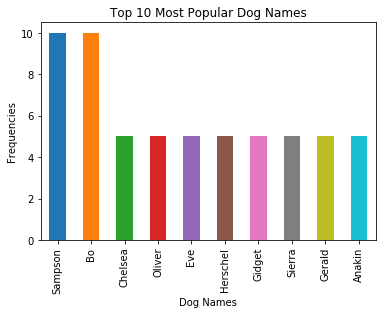

In [142]:
#Insight 1
#Top 10 Most Popular Dog Names
twt_df_final['name_y'].value_counts().head(10).plot.bar()
plt.xlabel('Dog Names')
plt.ylabel('Frequencies')
plt.title('Top 10 Most Popular Dog Names')

In [143]:
#Insight 2
#Create box and whisker plot of Total Retweets by Languages from Tweet data of We rate dogs
#sn.set(rc={"figure.figsize":(18, 8)})
#sn.boxplot(x = 'name_y', y = 'favourites_count', data=twt_df_final)
#plt.xlabel('Tweet Languages')
#plt.ylabel('Total Retweets')
#plt.title('Total Favourites by Dog Name')

Text(0.5,1,'Relationship Between Rating Numerator and Favourites')

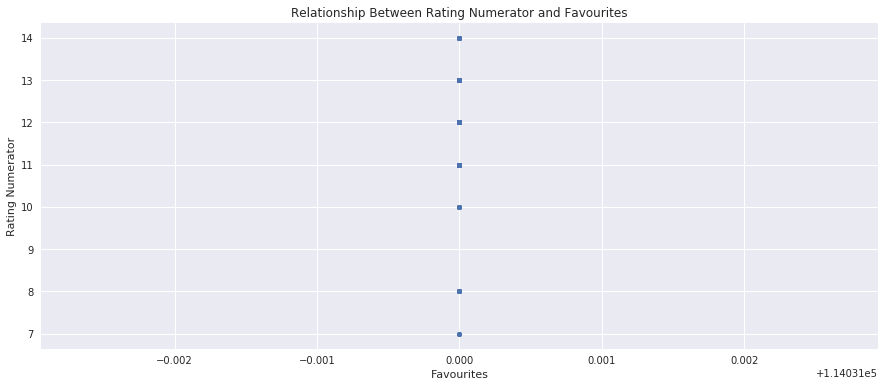

In [144]:
#Insight 2
#Examine the relationship between Rating Numerator and Favourites
sn.set(rc={"figure.figsize":(18, 6)})
twt_df_final.plot.scatter(y='rating_numerator', x='favourites_count', figsize=[15,6])
plt.ylabel('Rating Numerator')
plt.xlabel('Favourites')
plt.title('Relationship Between Rating Numerator and Favourites')

Text(0.5,1,'Relationship Between Favourities and Followers')

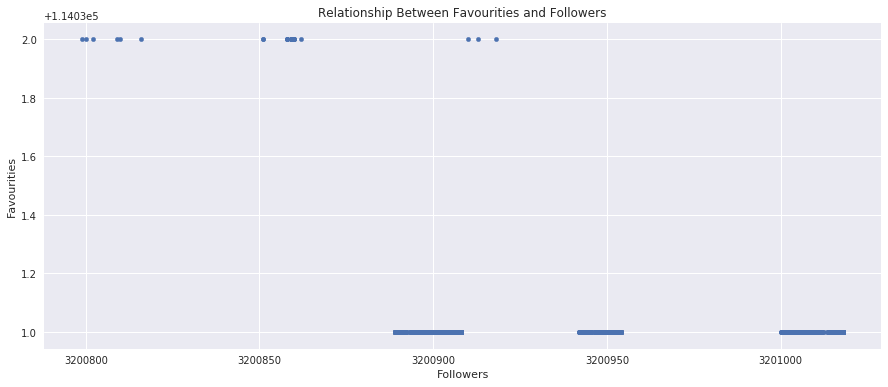

In [147]:
#Insight 3
#Examine the relationship between retweet and follower
sn.set(rc={"figure.figsize":(18, 6)})
twt_df_final.plot.scatter(y='favourites_count', x='followers_count', figsize=[15,6])
plt.xlabel('Followers')
plt.ylabel('Favourities')
plt.title('Relationship Between Favourities and Followers')

Text(0,0.5,' ')

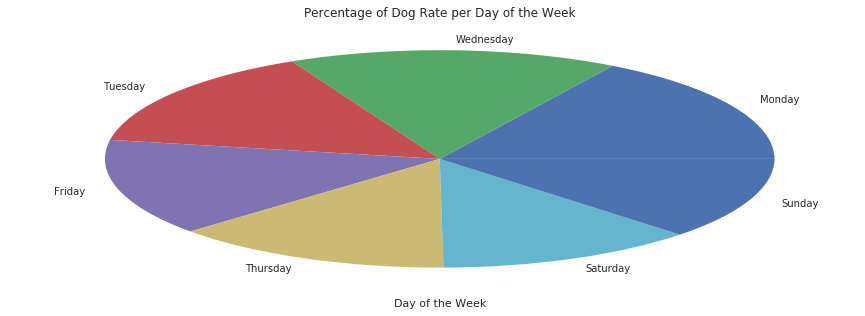

In [148]:
#Iinsight 4
#Create a pie chart that shows percentage of dog rate tweet per each calendar month
twt_df_final['twt.created_at'].dt.day_name().value_counts(normalize=True).mul(100).round(2).plot.pie(figsize=[15,5])
plt.title('Percentage of Dog Rate per Day of the Week')
plt.xlabel("Day of the Week")
plt.ylabel(" ")

#plt.ylabel("Percentage of Dog Rate Tweet")

Text(0,0.5,'Percentage of Dog Rate Tweet')

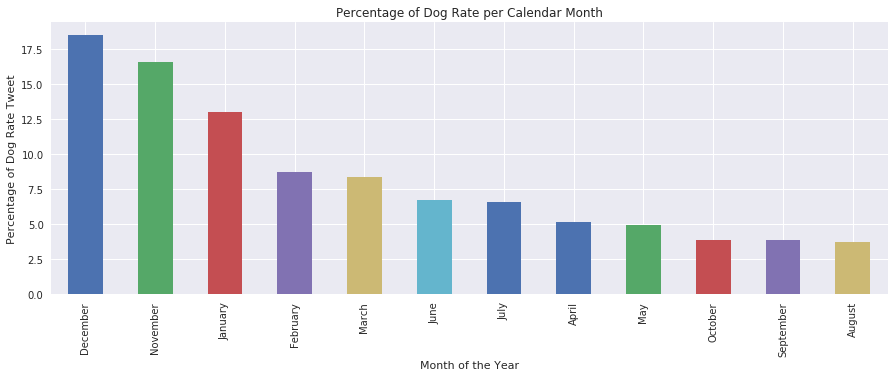

In [149]:
#Insight 5
#Create a bar chart that shows percentage of dog rate tweet per each calendar month
twt_df_final['twt.created_at'].dt.month_name().value_counts(normalize=True).mul(100).round(2).plot.bar(figsize=[15,5])
plt.title('Percentage of Dog Rate per Calendar Month')
plt.xlabel("Month of the Year")
plt.ylabel("Percentage of Dog Rate Tweet")

### Insights:
1. From insight 1, it is evident that Sampson and Bo are two most popular dog names among the dogs that were rated. As seen from the figure, one can expect any dog posted to bear one of these popular dog name.

2. The relationship between favorites and rating numerator neither depict positive nor negative correlation between the two factors. In fact, as seen from insight 2, there is zero relationship, or no relationship can be inferred from the visual. 

3.  From the insight 3, the visual evidence obtained from the scatter plot of favourities and follower counts show that higher follower counts might not result in higher favourities as there seems to exist no relationship between the two factors. From the figures, there appears that higher follower counts would garner high favourities, but this seems not be the case as the ones with average follower counts averagely got higher favourities than the one with higher followers. Nonetheless, the patterns from the visual shows that there is no visible any relationship be follower counts and number of favourities.  

4.  Monday, Tuesday and Wednesday accounted for 50% of the dog ratings performed while the remaining four days equally account for the remaining 50% as seen in insight 4.

5.  From the insight 5, it is evident that many of the dog ratings were in December, November and January. At the same, August, September and October are the months that dog ratings are least done.